# Preamble

I have recently EDA with python and some of ML modules of an online data science program and looking forward to apply my learning in a project mode.
<br>I am regularly working on it to improve and apply my new learnings.


# Loan Data

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

Notebook objective

The objective is to Classify customers into any of the given categories.
This analysis will generate valuable insights for banks to consider which customers they will provide loan to.

This notebook will provide the initial analysis and EDA finding. I will probably add some other parts, including ML, to this notebook later.

In [4]:
## Problem Statement : which customers should bank provide loan to.
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Math
import math

# Plot lib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

# Import ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [5]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Drive\\Resources\\Udemy\\Project datasets modified\\Loan Payment\\Loan Payment\\Loan payments data.csv")

In [6]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [8]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [9]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [10]:
df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [11]:
df['Gender'].value_counts()

male      423
female     77
Name: Gender, dtype: int64

## Visualizing the current data

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


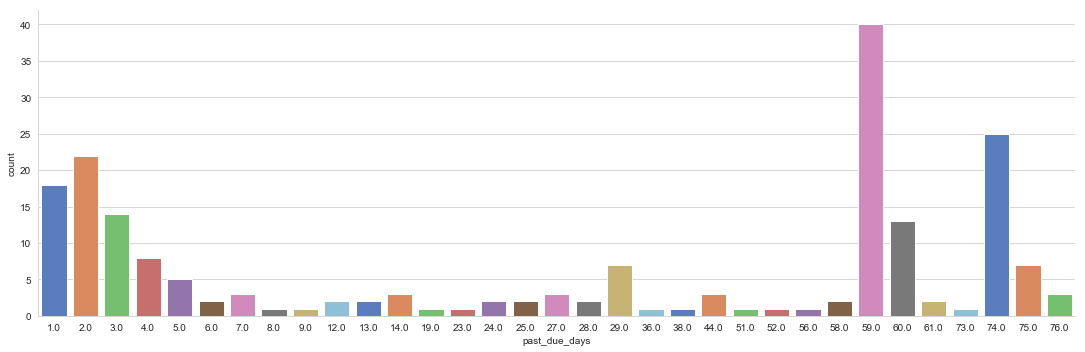

In [12]:
sns.factorplot("past_due_days", data=df, palette="muted", kind="count", aspect=3)

In [13]:
df.groupby('loan_status').mean()

,Principal,terms,past_due_days,age
loan_status,,,,
COLLECTION,954.0,23.850000,62.86,30.61
COLLECTION_PAIDOFF,957.0,23.920000,9.16,31.34
PAIDOFF,935.0,22.116667,NaN,31.21


Age/terms/principal is similar across all three caregories

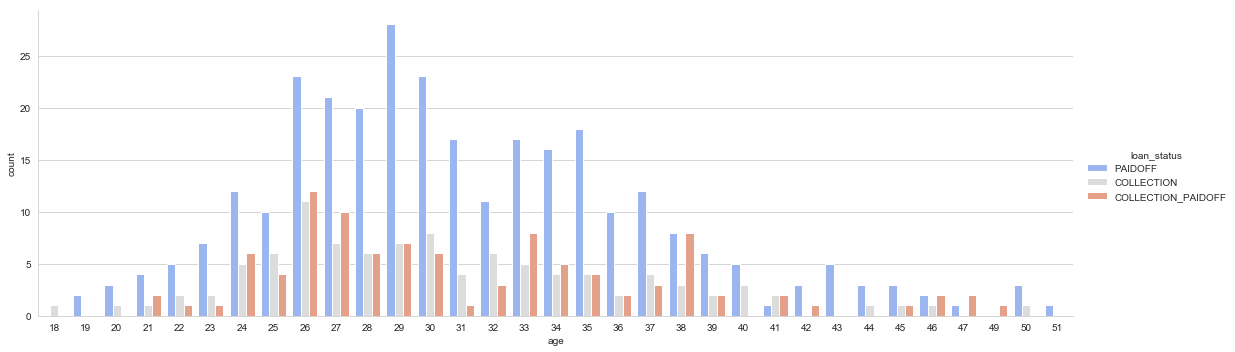

In [15]:
sns.catplot('age',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=3)

Some interesting information on age versus default now

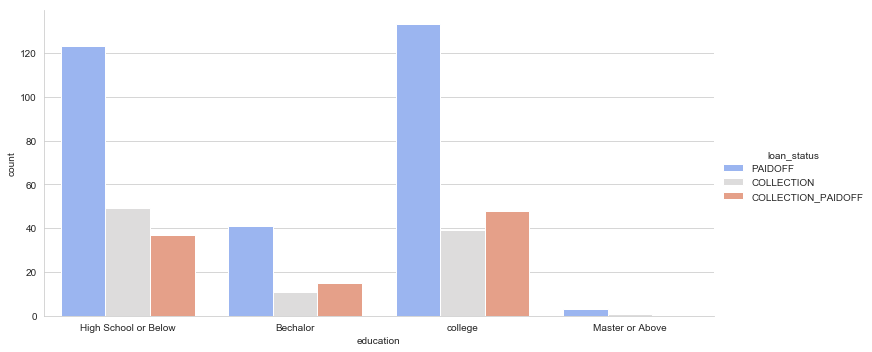

In [16]:
sns.catplot('education',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=2)

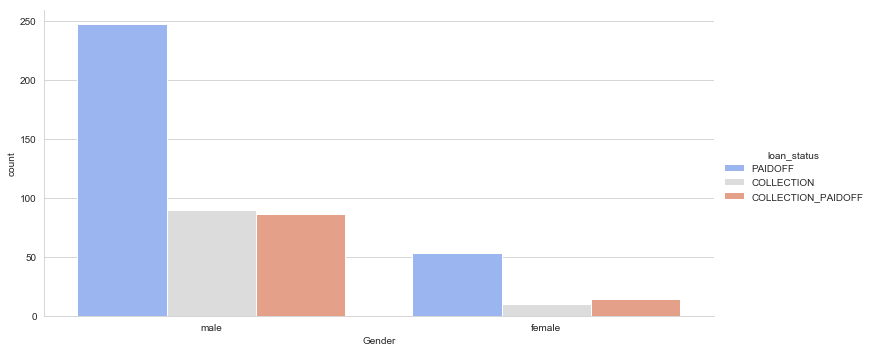

In [122]:
sns.catplot('Gender',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=2)

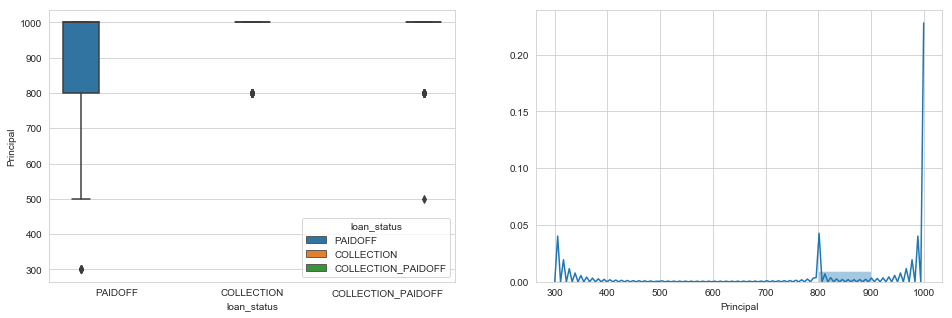

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=df, hue='loan_status', ax=axs[0])
sns.distplot(df.Principal, bins=range(300, 1000, 100), ax=axs[1], kde=True)
plt.show();

Based on the distribution alone, majority of the principal is 1,000. <br>Below aggregation shows more detail of the Principal with loan_status.

In [127]:
print(df[['loan_status', 'Principal', 'Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count']))

                             Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220


<b>Some Observations :</b>
<br />
<li>
    <ul>The two variables past_due_days and paid_off_time can be used to make spot-on predictions about the loan status</ul>
    <ul>Data seems to suggest that we are dealing with a sample population between the age of 18 and 51, primarily with college or high school education levels. Also, more than 80% of the clients are men.</ul>
    <ul>The data shows 300 of the 500 customers have paid off their loans, while 100 each remains in ‘collection’ and ‘paid off after collection’ category.
</li>


<b>Questions</b>
<br />
    Question 1 - Does the value of ‘Principal’ help determine whether or not the loan has been paid ?

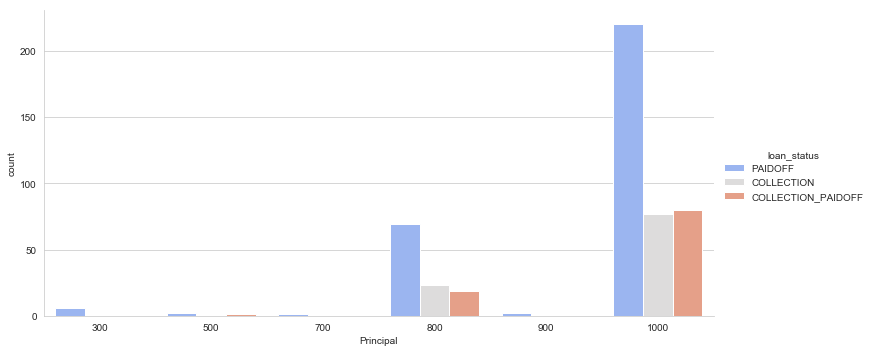

In [20]:
sns.catplot('Principal',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=2)

With Loans below 800, almost ~100% payback rate. 

<b>Follow Up Question</b>
<br>Question 1.1 - Does including ‘terms’ help separate out the values to help better determine whether or not the loan has been paid ?

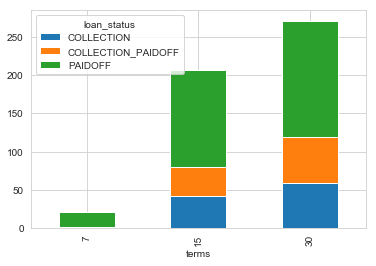

In [21]:
df.groupby(['terms', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
#df.plot(kind='bar', stacked=True)

<b>Finding : </b>Terms creates a visible separation of the loan status for one of its classes.
<br> 7 days/weekly term - clients who have borrowed at weekly terms seem to have paid off entirely their loans

<b>Another Follow up question</b><br>
Question 1.1.1 - How about when age is taken into consideration?

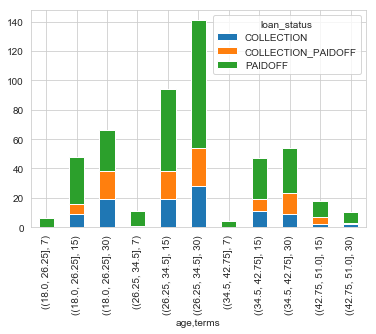

In [22]:
bins = np.linspace(df.age.min(), df.age.max(), 5)
df.groupby([pd.cut(df.age, bins),'terms', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)


Read the graph : The younger lots matched with terms (7,15,30) followed by Mid-aged (7,15,30) followed by older
<br><b>In all the age-groups</b> ...terms >7 days have resulted in loan defaults

<b>Question 1.1.2 - How about education ?</b>

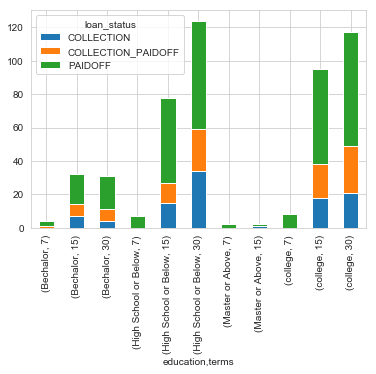

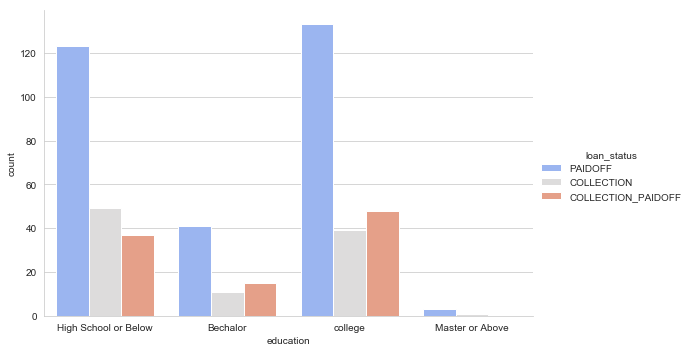

In [23]:
df.groupby(['education','terms', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
sns.catplot('education',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=1.5,)

Again regardless of the education, if the terms were on a weekly basis and the principal was less than 800, there was a 100% payback.<br><b>
Question 1.1.3 - Gender ?</b>

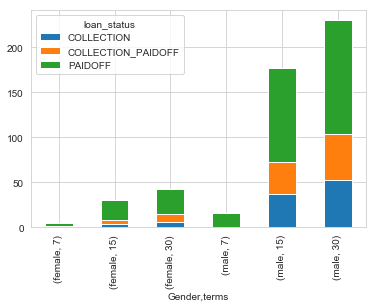

In [24]:
df.groupby(['Gender','terms', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)

#Key Finding:
<br><b>
Variables age, Gender and education</b> do not affect loan default simply due to terms offered to them 
<br> 7 day term in-general is a better term strategy wrt to lesser loan defaults

<b>Question 2 - Does age on its own help with loan_status prediction?

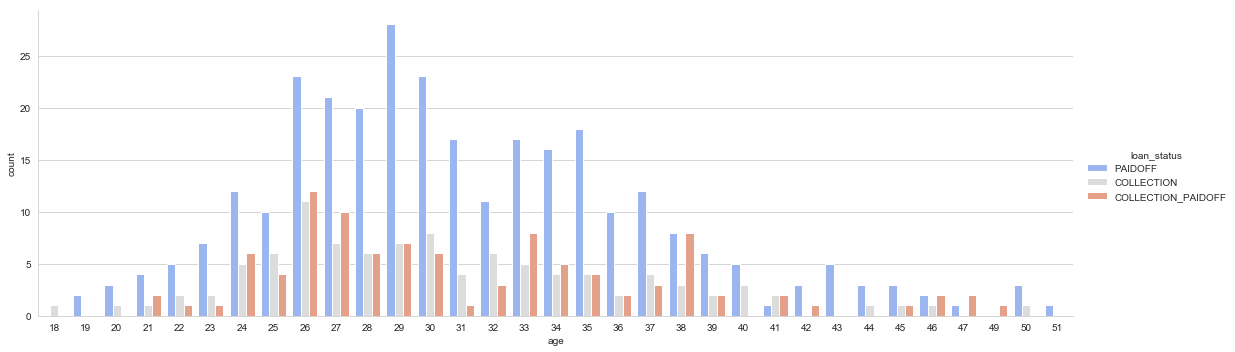

In [25]:
sns.catplot('age',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=3)

People of all ages are likely to default

<b>Question 2.1 - Does taking education into consideration help?


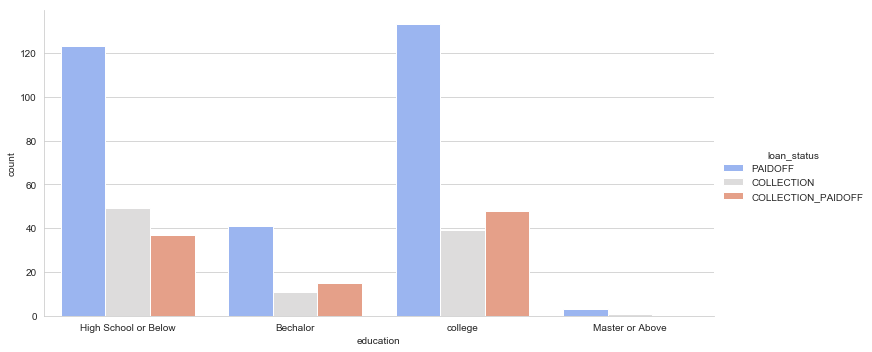

In [26]:
sns.catplot('education',data=df,hue='loan_status',palette='coolwarm',kind='count',aspect=2)

Nope! 

<b>Question 3 - Does the variable ‘past_due_days’ help me pinpoint the defaulters?
<br>




C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


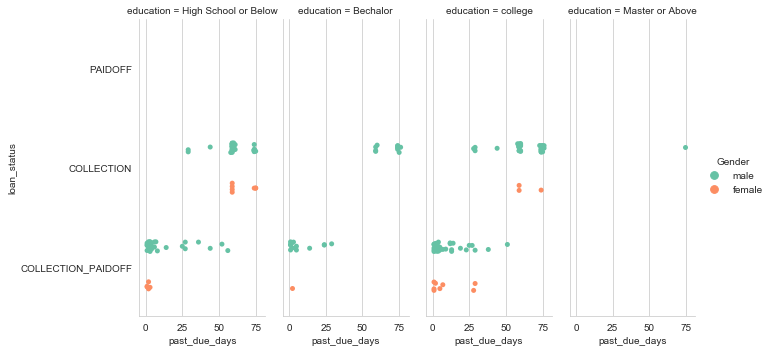

In [57]:
#! conda install -c anaconda seaborn=0.9.0
sns.catplot(x="past_due_days", y="loan_status", hue="Gender",kind="strip",col="education",jitter=True,data=df, palette="Set2",dodge=True, aspect=0.5)


<b>Question 4 - Does age gender or education have anything to do with time of payment?

In [138]:
#Making new colum - Total No. of days to pay from effective date
df['days_to_pay'] = pd.to_datetime(df['paid_off_time']) - pd.to_datetime(df['effective_date'])

df.days_to_pay = df.days_to_pay.dt.days
df.days_to_pay = df.days_to_pay.astype(int)
df.days_to_pay.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0     6
1    29
2    17
3    14
4    14
Name: days_to_pay, dtype: int32

In [118]:
bins = [0, 25,35,50,100]
df['age_group'] = pd.cut(df['age'], bins)
df['age_group'].head()


0    (35, 50]
1    (35, 50]
2    (25, 35]
3    (25, 35]
4    (25, 35]
Name: age_group, dtype: category
Categories (4, interval[int64]): [(0, 25] < (25, 35] < (35, 50] < (50, 100]]

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


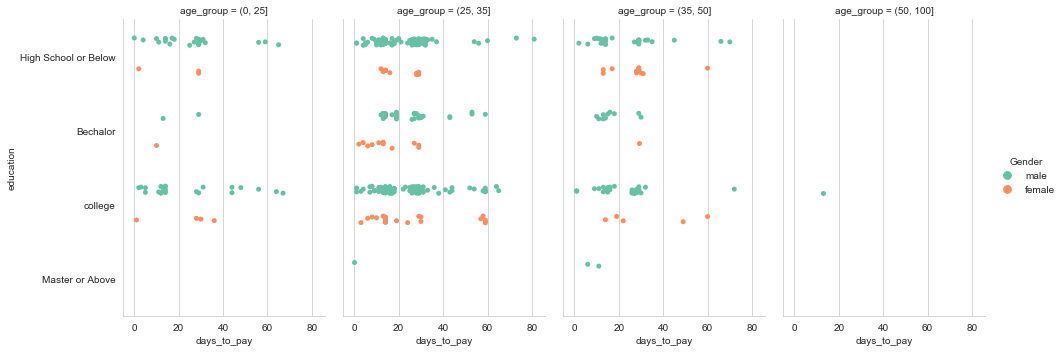

In [120]:
sns.catplot(x="days_to_pay", y="education", hue="Gender",kind="strip",col="age_group",jitter=True,data=df, palette="Set2",dodge=True,aspect=0.7)

In [144]:
# Quick view on education + gender => impact to loan_status
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True)


col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,24,30,43,136,3,151,400


In [146]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION_PAIDOFF,0.0025,0.0125,0.020,0.0350,0.08,0.0000,0.1000,0.25
PAIDOFF,0.0300,0.0475,0.055,0.0725,0.26,0.0075,0.2775,0.75
All,0.0325,0.0600,0.075,0.1075,0.34,0.0075,0.3775,1.00


In [148]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION_PAIDOFF,0.0100,0.050000,0.080000,0.140000,0.320000,0.0000,0.4000
PAIDOFF,0.0400,0.063333,0.073333,0.096667,0.346667,0.0100,0.3700
All,0.0325,0.060000,0.075000,0.107500,0.340000,0.0075,0.3775


In [149]:
pd.crosstab(df.loan_status, df.Gender + "_" + df.education, margins=True, normalize='columns')


col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION_PAIDOFF,0.076923,0.208333,0.266667,0.325581,0.235294,0.0,0.264901,0.25
PAIDOFF,0.923077,0.791667,0.733333,0.674419,0.764706,1.0,0.735099,0.75


In the next figure, is there any pattern of the no. of days to pay off ?

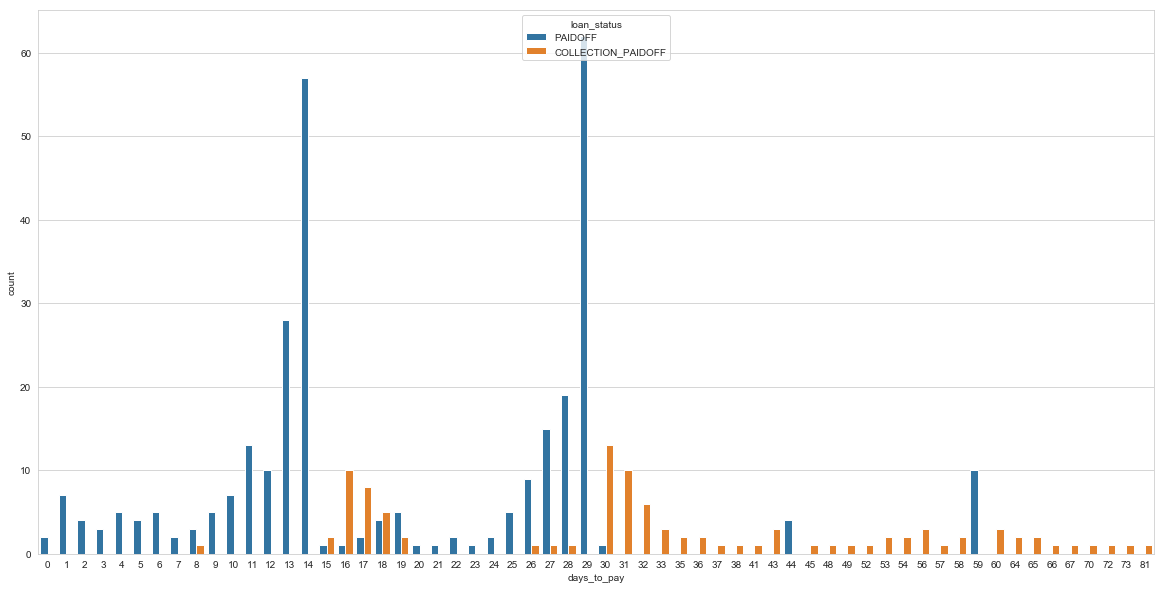

In [139]:
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='days_to_pay', data=df.loc[df.loan_status.isin(['COLLECTION_PAIDOFF', 'PAIDOFF'])] , hue='loan_status')
plt.show()

<b>As expected, people are more likely to pay off the loan on the last day. Big spike on day 14 and day 29 for 15-day and 30-day terms, respectively.

## Modeling For ML

<br>
<b> Objective : To classify people who will likely to pay the loan off on time.</b>
<br>For a better understanding, I will assume those in COLLECTION or COLLECTION_PAIDOFF the same, hence don't pay on the loan due date.<br>
First, let's prepare the data for model.

In [155]:
df.loc[(df.loan_status == 'PAIDOFF') & (df.days_to_pay > 30), 'loan_status'] = 'COLLECTION_PAIDOFF'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Now let's change the categorical target variables to numeric one. ..<br>As per stated earlier, I will merge COLLECTION and COLLECTION_PAIDOFF to the same category, hence didn't pay on-time.

In [156]:
status_map = {"PAIDOFF": 1, "COLLECTION": 2, "COLLECTION_PAIDOFF": 2 }
df['loan_status_trgt'] = df['loan_status'].map(status_map)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Convert education and Gender to the dummy variables.

In [157]:
dummies = pd.get_dummies(df['education']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['education'],  axis=1)

dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Gender'], axis=1)

df = df.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'days_to_pay'], axis=1)

Normally, when we create dummy variables, we need to drop 1 variable of those to avoid dummy trap. In this case, we will drop is_female and is_Master or Above variable.

In [158]:
dummy_var = ['is_female', 'is_Master or Above']
df = df.drop(dummy_var, axis = 1)

print(df.head(2))

   Principal  terms  age age_group  loan_status_trgt  is_Bechalor  \
0       1000     30   45  (35, 50]                 1            0   
1       1000     30   50  (35, 50]                 1            1   

   is_High School or Below  is_college  is_male  
0                        1           0        1  
1                        0           0        0  


Let's create X (model input) and y (target variable).

In [160]:
X = df.drop(['loan_status_trgt'], axis=1)
y = df.loan_status_trgt

In [175]:
# ML library

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Create function to evaluate the score of each classification model
def eval_model_classifier(model, data, target):
    split_ratio = 0.8
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY)    
    return model.score(testX,testY)

In [180]:
### 1st round: RandomForestClassification

# Initialise values
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 5 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("RandomForestClassification Starts!")
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        #score_array[i] = eval_model_classifier(rf_class, X, y, 0.8)
        split_ratio = 0.8
        
        trainX, testX, trainY, testY = train_test_split(X, y, train_size=split_ratio, random_state=0)
        rf_class.fit(trainX, trainY)
        score_array[i]=rf_class.score(testX,testY)  
        print("Try {} with n_estimators = {} and score = {}".format(i, n_estimators, score_array[i]))
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

print("RandomForestClassification Done!")

RandomForestClassification Starts!


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'